In [1]:

import numpy as np
import torch 
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import nn,optim

/Users/ouyuan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,),(0.5,)),
                                ])

In [3]:
trainset = datasets.MNIST('/Users/ouyuan/Desktop/workdir/Handwritten_Recognition/',download=True,train=True,transform=transform)

valset= datasets.MNIST('/Users/ouyuan/Desktop/workdir/Handwritten_Recognition/',download=True,train=True,transform=transform)

trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 14734423.86it/s]


Extracting /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw/train-images-idx3-ubyte.gz to /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 367569.07it/s]


Extracting /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6015822.14it/s]


Extracting /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16213215.97it/s]

Extracting /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/ouyuan/Desktop/workdir/Handwritten_Recognition/MNIST/raw



In [5]:

dataiter =iter(trainloader)
images,labels = dataiter.__next__()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


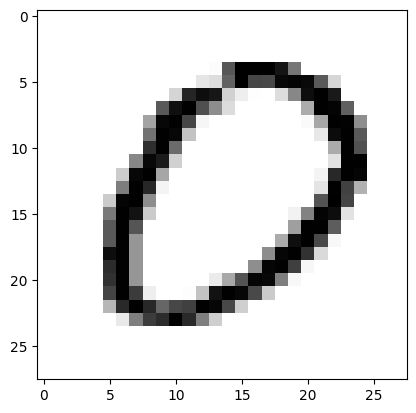

In [6]:
plt.imshow(images[0].numpy().squeeze(),cmap ='gray_r')

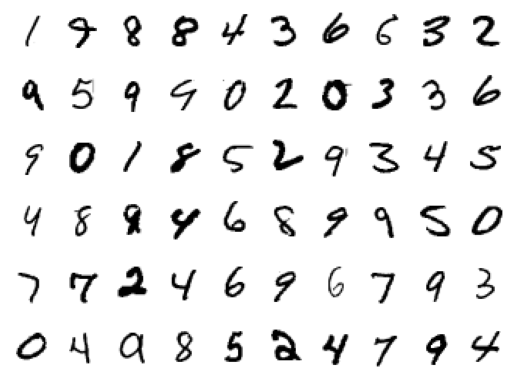

In [9]:

## 显示更多图片

figure = plt.figure()

num_of_images =60

for index in range(1,num_of_images +1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray_r')


In [10]:

## 构建神经网络

input_size = 784
hidden_sizes = [128,64]

output_size =10

model = nn.Sequential(
    nn.Linear(input_size,hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0],hidden_sizes[1]),
    nn.Linear(hidden_sizes[1],output_size),
    nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=10, bias=True)
  (4): LogSoftmax(dim=1)
)


In [11]:


criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images =images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels) 



In [12]:
## 查看训练前后的权重值

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0036, -0.0036, -0.0036,  ..., -0.0036, -0.0036, -0.0036],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021]])


In [13]:
## 训练模型
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=.9)

time0 = time()
epochs = 15

for e in range(epochs):
    runinng_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
        runinng_loss += loss.item()
    else:
        print("Epoch")
    
    
print("\n Training Time (in minutes) = ",(time()-time0)/60)



Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch
Epoch

 Training Time (in minutes) =  2.163382685184479


预测结果 5


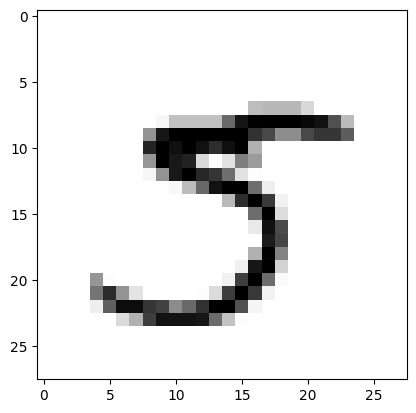

In [19]:

## 测试验证模型

images ,labels = next(iter(valloader))
## 显示图片
plt.imshow(images[0].numpy().squeeze(),cmap ='gray_r')

img = images[0].view(1,784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

probab = list(ps.numpy()[0])

print("预测结果",probab.index(max(probab)))

# view_classify(img.view(1,28,28),ps)

In [20]:
## 验证准确率

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 60000

Model Accuracy = 0.9860166666666667


In [ ]:
torch.save(model,'./hr.pt')